In [ ]:
import pandas as pd
import numpy as np
import re
import librosa
from tqdm import tqdm
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa


# Funciones

In [ ]:
def extract_mfcc(file_path, n_mfcc=20):
    try:
        # Cargar el archivo de audio
        y, sr = librosa.load(file_path, sr=None)

        # Extraer MFCC
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # Calcular la media de cada coeficiente MFCC
        mfcc_means = np.mean(mfccs, axis=1)

        return mfcc_means
    except Exception as e:
        print(f"Error procesando {file_path}: {e}")
        return np.full(n_mfcc, np.nan)

def extract_audio_features(file_path, n_mfcc=20):
    try:
        y, sr = librosa.load(file_path, sr=None)

        # Chroma
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)

        # Spectral Contrast
        spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)

        # Zero Crossing Rate
        zero_crossing = np.mean(librosa.feature.zero_crossing_rate(y), axis=1)

        # Spectral Rolloff
        rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr), axis=1)

        # Tempo (BPM)
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)


        return np.hstack([chroma, spectral_contrast, zero_crossing, rolloff, tempo])

    except Exception as e:
        print(f"Error procesando {file_path}: {e}")
        return np.full(12 + 7 + 1 + 1 + 1, np.nan)  # Rellenar con NaN en caso de error


# Limpieza

In [ ]:
canciones = pd.read_csv('/content/drive/MyDrive/Bootcamp_DS/ML/IA/train.csv')

In [ ]:
canciones

,song_id,filename,filepath,genre_id,genre
0,10150,010150.ogg,train/010150.ogg,7,Instrumental
1,7358,007358.ogg,train/007358.ogg,2,Punk
2,20573,020573.ogg,train/020573.ogg,5,Folk
3,11170,011170.ogg,train/011170.ogg,12,Old-Time / Historic
4,16662,016662.ogg,train/016662.ogg,1,Rock
...,...,...,...,...,...
19917,9337,009337.ogg,train/009337.ogg,0,Electronic
19918,8340,008340.ogg,train/008340.ogg,4,Hip-Hop
19919,16248,016248.ogg,train/016248.ogg,4,Hip-Hop
19920,11875,011875.ogg,train/011875.ogg,2,Punk


In [ ]:
# Se sustituye el .ogg por .wav

canciones["filepath"] = canciones["filepath"].str.replace(".ogg", ".wav")

In [ ]:
# Se cambia el file path para que coincida con la estructura de carpetas

canciones["filepath"] = canciones.apply(lambda row: row["filepath"].replace("train", str(row["genre_id"])), axis=1)

In [ ]:
# Se eliminan los 0 entre / y el primer numero para que coincida exactamente con la estructura de carpetas

canciones["filepath"] = canciones["filepath"].apply(lambda x: re.sub(r"/0+", "/", x))

In [ ]:
canciones[canciones["filepath"] == "0/.wav"]

,song_id,filename,filepath,genre_id,genre
16360,0,000000.ogg,0/.wav,0,Electronic


In [ ]:
canciones.iloc[16360].values

array([0, '000000.ogg', '0/.wav', 0, 'Electronic'], dtype=object)

In [ ]:
canciones.loc[16360] = [0, '000000.ogg', '0/0.wav', 0, 'Electronic']

In [ ]:
canciones.loc[16360][2]

<ipython-input-12-d08fa6457e6e>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  canciones.loc[16360][2]


'0/0.wav'

In [ ]:
AUDIO_BASE_PATH = "/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/"

In [ ]:
mfcc_features = []
for _, row in tqdm(canciones.iterrows(), total=len(canciones)):
    file_path = os.path.join(AUDIO_BASE_PATH, row["filepath"])
    mfcc = extract_mfcc(file_path)
    mfcc_features.append(mfcc)

  7%|▋         | 1359/19922 [08:38<1:55:25,  2.68it/s]<ipython-input-7-3e42b1a4357d>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/1/3137.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/1/3137.wav'


 23%|██▎       | 4668/19922 [28:20<1:25:26,  2.98it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/2/11088.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/2/11088.wav'


 26%|██▌       | 5150/19922 [31:15<1:32:18,  2.67it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/7/16312.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/7/16312.wav'


 44%|████▍     | 8764/19922 [53:55<1:02:17,  2.99it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/0/24899.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/0/24899.wav'


 51%|█████     | 10155/19922 [1:02:02<52:41,  3.09it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/4040.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/4040.wav'


 55%|█████▍    | 10873/19922 [1:06:11<48:35,  3.10it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/3/9963.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/3/9963.wav'


 57%|█████▋    | 11386/19922 [1:09:12<47:01,  3.03it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/15980.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/15980.wav'


 58%|█████▊    | 11497/19922 [1:09:51<48:50,  2.87it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/22698.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/22698.wav'


 72%|███████▏  | 14377/19922 [1:26:45<32:27,  2.85it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/5/23078.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/5/23078.wav'


 74%|███████▍  | 14827/19922 [1:29:27<27:13,  3.12it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/0/17940.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/0/17940.wav'


 76%|███████▌  | 15145/19922 [1:31:19<28:05,  2.83it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/1/22295.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/1/22295.wav'


 82%|████████▏ | 16360/19922 [1:38:28<21:14,  2.79it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/0/.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/0/.wav'


 93%|█████████▎| 18537/19922 [1:51:23<07:20,  3.14it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/2/3071.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/2/3071.wav'


 94%|█████████▍| 18796/19922 [1:52:53<06:09,  3.05it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/13954.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/13954.wav'


100%|██████████| 19922/19922 [2:00:47<00:00,  2.75it/s]


In [ ]:
mfcc_df = pd.DataFrame(mfcc_features, columns=[f"MFCC_{i+1}" for i in range(20)])

# Concatenar con el dataset original
canciones = pd.concat([canciones, mfcc_df], axis=1)

# Guardar el nuevo dataset con MFCCs en CSV
canciones.to_csv("/content/drive/MyDrive/Bootcamp_DS/ML/IA/train_with_mfcc.csv", index=False)

# También guardarlo como un archivo .npy más eficiente
np.save("/content/drive/MyDrive/Bootcamp_DS/ML/IAtrain_mfcc.npy", mfcc_df.to_numpy())

print("¡Procesamiento de MFCC completado y guardado!")

¡Procesamiento de MFCC completado y guardado!


In [ ]:
features = []
for _, row in tqdm(canciones.iterrows(), total=len(canciones)):
    file_path = os.path.join(AUDIO_BASE_PATH, row["filepath"])
    audio_features = extract_audio_features(file_path)
    features.append(audio_features)

print("Procesamiento de features completado")

  4%|▍         | 749/19922 [08:37<3:11:42,  1.67it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
  7%|▋         | 1359/19922 [14:57<3:05:05,  1.67it/s]<ipython-input-2-04a30c4ef63d>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/1/3137.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/1/3137.wav'


 23%|██▎       | 4668/19922 [49:17<2:25:20,  1.75it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/2/11088.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/2/11088.wav'


 26%|██▌       | 5150/19922 [54:16<2:51:49,  1.43it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/7/16312.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/7/16312.wav'


 44%|████▍     | 8764/19922 [1:31:31<1:49:02,  1.71it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/0/24899.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/0/24899.wav'


 51%|█████     | 10155/19922 [1:45:53<1:49:53,  1.48it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/4040.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/4040.wav'


 55%|█████▍    | 10873/19922 [1:53:16<1:40:01,  1.51it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/3/9963.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/3/9963.wav'


 57%|█████▋    | 11386/19922 [1:58:34<1:25:02,  1.67it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/15980.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/15980.wav'


 58%|█████▊    | 11497/19922 [1:59:44<1:23:18,  1.69it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/22698.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/22698.wav'


 72%|███████▏  | 14377/19922 [2:29:10<52:22,  1.76it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/5/23078.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/5/23078.wav'


 74%|███████▍  | 14827/19922 [2:33:47<54:05,  1.57it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/0/17940.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/0/17940.wav'


 76%|███████▌  | 15145/19922 [2:37:05<45:06,  1.77it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/1/22295.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/1/22295.wav'


 93%|█████████▎| 18537/19922 [3:12:07<13:10,  1.75it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/2/3071.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/2/3071.wav'


 94%|█████████▍| 18796/19922 [3:14:49<10:58,  1.71it/s]

Error procesando /content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/13954.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/4/13954.wav'


100%|██████████| 19922/19922 [3:26:28<00:00,  1.61it/s]

Procesamiento de features completado


In [ ]:
df_canciones = pd.read_csv('/content/drive/MyDrive/Bootcamp_DS/ML/IA/train_with_mfcc.csv')

In [ ]:
features_df = pd.DataFrame(features, columns=[f"Chroma_{i+1}" for i in range(12)] + [f"Spectral_contrast_{i+1}" for i in range(7)] + ["Zero_crossing_rate", "Spectral_Rolloff", "Tempo"])

# Concatenar con el dataset original
canciones = pd.concat([df_canciones, features_df], axis=1)

# Guardar el nuevo dataset con MFCCs en CSV
canciones.to_csv("/content/drive/MyDrive/Bootcamp_DS/ML/IA/train_with_features.csv", index=False)

# También guardarlo como un archivo .npy
np.save("/content/drive/MyDrive/Bootcamp_DS/ML/IA/train_features.npy", features_df.to_numpy())

print("¡Procesamiento de Features completado y guardado!")

¡Procesamiento de Features completado y guardado!


In [ ]:
canciones.head()

,song_id,filename,filepath,genre_id,genre,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,...,Spectral_contrast_1,Spectral_contrast_2,Spectral_contrast_3,Spectral_contrast_4,Spectral_contrast_5,Spectral_contrast_6,Spectral_contrast_7,Zero_crossing_rate,Spectral_Rolloff,Tempo
0,10150.0,010150.ogg,7/10150.wav,7.0,Instrumental,-211.066559,100.593956,42.598457,23.165283,2.860841,...,21.386073,15.048431,19.512610,18.882236,18.863038,18.122647,32.015794,0.077645,5338.702237,99.384014
1,7358.0,007358.ogg,2/7358.wav,2.0,Punk,-14.467098,99.263069,-2.664984,26.246733,2.537334,...,19.588156,15.563457,14.650135,15.127776,14.944055,15.950120,32.152157,0.089975,4993.001050,129.199219
2,20573.0,020573.ogg,5/20573.wav,5.0,Folk,-317.806274,90.202530,-36.330082,18.486454,-25.418125,...,20.266996,23.585947,26.534958,28.264729,27.093563,28.284045,29.978877,0.084341,3569.498962,143.554688
3,11170.0,011170.ogg,12/11170.wav,12.0,Old-Time / Historic,-264.162598,143.274414,-109.257156,-26.363281,-6.620979,...,14.096315,24.104490,21.017506,21.392954,24.337095,36.129121,29.047427,0.135823,2340.874012,143.554688
4,16662.0,016662.ogg,1/16662.wav,1.0,Rock,2.097910,85.692604,-1.235375,24.334158,1.336215,...,20.933786,14.613464,16.905879,17.289535,17.331272,16.129306,33.096209,0.125767,5761.316079,89.102909


In [ ]:
df_canciones = pd.read_csv('/content/drive/MyDrive/Bootcamp_DS/ML/IA/train_with_mfcc.csv')

In [ ]:
df_canciones.loc[16360, "filepath"] = "0/0.wav"

In [ ]:
df_canciones.loc[16360].values

array([0, '000000.ogg', '0/0.wav', 0, 'Electronic', nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan], dtype=object)

In [ ]:
mfcc_0 = extract_mfcc("/content/drive/MyDrive/Bootcamp_DS/ML/TRAIN_V2/data_out_2/0/0.wav")

In [ ]:
mfcc_0

array([-181.71925  ,  133.34796  ,   14.8828945,   26.577473 ,
          8.056044 ,   15.998042 ,   -4.473025 ,    4.1229315,
          0.8465411,    3.4274905,   -7.135882 ,   -1.218502 ,
         -2.9580157,    1.9757385,  -11.066191 ,    1.1861942,
         -7.8885903,    2.1857052,   -5.7356305,   -5.1370807],
      dtype=float32)

In [ ]:
df_canciones.loc[16360] = [0, '000000.ogg', '0/0.wav', 0, 'Electronic', -181.71925  ,  133.34796  ,   14.8828945,   26.577473 ,
          8.056044 ,   15.998042 ,   -4.473025 ,    4.1229315,
          0.8465411,    3.4274905,   -7.135882 ,   -1.218502 ,
         -2.9580157,    1.9757385,  -11.066191 ,    1.1861942,
         -7.8885903,    2.1857052,   -5.7356305,   -5.1370807]

In [ ]:
df_canciones.loc[16360]

,16360
song_id,0
filename,000000.ogg
filepath,0/0.wav
genre_id,0
genre,Electronic
MFCC_1,-181.71925
MFCC_2,133.34796
MFCC_3,14.882895
MFCC_4,26.577473
MFCC_5,8.056044


In [ ]:
df_canciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19922 entries, 0 to 19921
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   song_id   19922 non-null  int64  
 1   filename  19922 non-null  object 
 2   filepath  19922 non-null  object 
 3   genre_id  19922 non-null  int64  
 4   genre     19922 non-null  object 
 5   MFCC_1    19909 non-null  float64
 6   MFCC_2    19909 non-null  float64
 7   MFCC_3    19909 non-null  float64
 8   MFCC_4    19909 non-null  float64
 9   MFCC_5    19909 non-null  float64
 10  MFCC_6    19909 non-null  float64
 11  MFCC_7    19909 non-null  float64
 12  MFCC_8    19909 non-null  float64
 13  MFCC_9    19909 non-null  float64
 14  MFCC_10   19909 non-null  float64
 15  MFCC_11   19909 non-null  float64
 16  MFCC_12   19909 non-null  float64
 17  MFCC_13   19909 non-null  float64
 18  MFCC_14   19909 non-null  float64
 19  MFCC_15   19909 non-null  float64
 20  MFCC_16   19909 non-null  fl

In [ ]:
df_canciones[df_canciones["MFCC_1"].isnull()]["genre_id"].value_counts().sort_index()

,count
genre_id,
0,2
1,2
2,2
3,1
4,4
5,1
7,1


In [ ]:
df_canciones["genre_id"].value_counts().sort_index()

,count
genre_id,
0,3073
1,3097
2,2584
3,1801
4,1761
5,1215
6,1181
7,1045
8,945


In [ ]:
df_canciones.dropna(inplace=True)

In [ ]:
df_canciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19909 entries, 0 to 19921
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   song_id   19909 non-null  int64  
 1   filename  19909 non-null  object 
 2   filepath  19909 non-null  object 
 3   genre_id  19909 non-null  int64  
 4   genre     19909 non-null  object 
 5   MFCC_1    19909 non-null  float64
 6   MFCC_2    19909 non-null  float64
 7   MFCC_3    19909 non-null  float64
 8   MFCC_4    19909 non-null  float64
 9   MFCC_5    19909 non-null  float64
 10  MFCC_6    19909 non-null  float64
 11  MFCC_7    19909 non-null  float64
 12  MFCC_8    19909 non-null  float64
 13  MFCC_9    19909 non-null  float64
 14  MFCC_10   19909 non-null  float64
 15  MFCC_11   19909 non-null  float64
 16  MFCC_12   19909 non-null  float64
 17  MFCC_13   19909 non-null  float64
 18  MFCC_14   19909 non-null  float64
 19  MFCC_15   19909 non-null  float64
 20  MFCC_16   19909 non-null  float64

In [ ]:
df_canciones.to_csv("/content/drive/MyDrive/Bootcamp_DS/ML/IA/train_with_mfcc.csv", index=False)

# EDA

In [2]:
df = pd.read_csv("../data/train_with_features.csv")
df_genres =  pd.read_csv("../data/genres.csv")

In [4]:
df.head()

,song_id,filename,filepath,genre_id,genre,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,...,Spectral_contrast_1,Spectral_contrast_2,Spectral_contrast_3,Spectral_contrast_4,Spectral_contrast_5,Spectral_contrast_6,Spectral_contrast_7,Zero_crossing_rate,Spectral_Rolloff,Tempo
0,10150.0,010150.ogg,7/10150.wav,7.0,Instrumental,-211.066559,100.593956,42.598457,23.165283,2.860841,...,21.386073,15.048431,19.512610,18.882236,18.863038,18.122647,32.015794,0.077645,5338.702237,99.384014
1,7358.0,007358.ogg,2/7358.wav,2.0,Punk,-14.467098,99.263069,-2.664984,26.246733,2.537334,...,19.588156,15.563457,14.650135,15.127776,14.944055,15.950120,32.152157,0.089975,4993.001050,129.199219
2,20573.0,020573.ogg,5/20573.wav,5.0,Folk,-317.806274,90.202530,-36.330082,18.486454,-25.418125,...,20.266996,23.585947,26.534958,28.264729,27.093563,28.284045,29.978877,0.084341,3569.498962,143.554688
3,11170.0,011170.ogg,12/11170.wav,12.0,Old-Time / Historic,-264.162598,143.274414,-109.257156,-26.363281,-6.620979,...,14.096315,24.104490,21.017506,21.392954,24.337095,36.129121,29.047427,0.135823,2340.874012,143.554688
4,16662.0,016662.ogg,1/16662.wav,1.0,Rock,2.097910,85.692604,-1.235375,24.334158,1.336215,...,20.933786,14.613464,16.905879,17.289535,17.331272,16.129306,33.096209,0.125767,5761.316079,89.102909


In [3]:
df =df.copy().drop(columns=["song_id","filename", "filepath"])

In [4]:
df_genres

,genre,genre_id
0,Electronic,0
1,Rock,1
2,Punk,2
3,Experimental,3
4,Hip-Hop,4
5,Folk,5
6,Chiptune / Glitch,6
7,Instrumental,7
8,Pop,8
9,International,9


In [6]:
df["genre"].value_counts()

genre
Rock                   3093
Electronic             3071
Punk                   2582
Experimental           1798
Hip-Hop                1753
Folk                   1214
Chiptune / Glitch      1181
Instrumental           1043
Pop                     945
International           813
Ambient Electronic      794
Classical               495
Old-Time / Historic     408
Jazz                    305
Country                 142
Soul-RnB                 94
Spoken                   94
Blues                    58
Easy Listening           13
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   genre_id             19896 non-null  float64
 1   genre                19896 non-null  object 
 2   MFCC_1               19896 non-null  float64
 3   MFCC_2               19896 non-null  float64
 4   MFCC_3               19896 non-null  float64
 5   MFCC_4               19896 non-null  float64
 6   MFCC_5               19896 non-null  float64
 7   MFCC_6               19896 non-null  float64
 8   MFCC_7               19896 non-null  float64
 9   MFCC_8               19896 non-null  float64
 10  MFCC_9               19896 non-null  float64
 11  MFCC_10              19896 non-null  float64
 12  MFCC_11              19896 non-null  float64
 13  MFCC_12              19896 non-null  float64
 14  MFCC_13              19896 non-null  float64
 15  MFCC_14              19896 non-null 

In [8]:
df.drop(columns=["genre_id"]).iloc[:, :17].describe()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16
count,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000
mean,-125.529577,107.025857,-2.346933,24.861780,3.295273,7.536611,-2.163937,5.199909,-4.229629,3.348219,-4.079369,2.064430,-3.739160,0.586410,-3.717505,0.525599
std,105.741669,37.388118,28.032483,16.663842,11.998561,11.692374,8.995963,8.655868,7.282791,7.527119,6.253168,6.269562,5.634275,5.499151,5.113756,5.058201
min,-1131.371094,-112.040459,-151.548508,-79.652138,-68.739540,-68.036690,-62.397160,-52.233746,-57.517368,-56.403454,-40.476368,-41.703449,-37.050411,-32.315281,-33.212963,-30.623035
25%,-186.193954,81.860443,-17.463277,16.825820,-3.129947,2.315091,-6.737430,0.965373,-8.254426,-0.274014,-7.610224,-1.202316,-6.964537,-2.592473,-6.862871,-2.485354
50%,-107.098255,102.740917,-0.470232,25.883094,3.988434,8.820339,-1.524653,6.350443,-3.703821,4.393819,-3.653449,2.784689,-3.472710,0.972205,-3.659696,0.840910
75%,-49.061788,127.787195,14.822614,34.670825,10.600910,14.651928,3.269604,10.742924,0.458932,8.097850,-0.109212,6.110394,-0.238409,4.147237,-0.531742,3.760784
max,166.331284,270.481567,125.074623,114.889336,57.390705,57.963482,59.400078,42.303043,30.863672,56.384342,37.253342,35.237431,26.417503,34.161304,30.597403,32.301743


In [9]:
df.iloc[:, 17:32].describe()

,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20,Chroma_1,Chroma_2,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,Chroma_8,Chroma_9,Chroma_10
count,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000
mean,0.525599,-4.052295,0.683122,-3.684246,0.636031,0.394841,0.373253,0.400789,0.379559,0.404878,0.379004,0.377137,0.402577,0.388739,0.415169
std,5.058201,4.983868,4.546899,4.433484,4.638554,0.147545,0.135814,0.144894,0.137541,0.147626,0.142384,0.138648,0.146102,0.142746,0.150790
min,-30.623035,-45.737411,-40.808502,-36.947407,-21.776045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.485354,-7.127872,-1.996701,-6.397865,-2.102943,0.292105,0.278336,0.301312,0.284451,0.303224,0.280556,0.281642,0.302649,0.289009,0.311090
50%,0.840910,-4.095992,0.883036,-3.700778,0.757596,0.386922,0.366621,0.395801,0.375123,0.402584,0.374333,0.373035,0.399716,0.383609,0.411278
75%,3.760784,-1.145319,3.574479,-1.050231,3.439114,0.488513,0.458647,0.492910,0.469885,0.502534,0.469947,0.466724,0.496996,0.479327,0.513670
max,32.301743,28.270512,33.262329,30.909306,38.092606,1.000000,0.992787,0.996922,1.000000,0.999521,0.999658,0.999729,1.000000,0.997452,0.990514


In [10]:
df.iloc[:, 32:].describe()

,Chroma_11,Chroma_12,Spectral_contrast_1,Spectral_contrast_2,Spectral_contrast_3,Spectral_contrast_4,Spectral_contrast_5,Spectral_contrast_6,Spectral_contrast_7,Zero_crossing_rate,Spectral_Rolloff,Tempo
count,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000
mean,0.381686,0.397382,20.274966,15.783819,18.789901,19.005855,19.726566,19.842773,30.985556,0.089358,4167.355487,120.311502
std,0.139467,0.143476,3.254313,2.638141,2.974636,3.297671,3.805465,4.054305,3.727734,0.047631,1620.235004,29.184974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285248,0.297084,18.169184,13.950327,16.677622,16.709068,17.102185,17.183646,29.682103,0.057199,3004.747827,99.384014
50%,0.376698,0.395038,20.239675,15.288925,18.368082,18.333348,18.786448,18.737786,31.506499,0.082599,4230.090171,117.453835
75%,0.471785,0.492563,22.248898,17.176340,20.569329,20.703841,21.389702,21.259545,33.052547,0.112040,5307.557197,135.999178
max,0.993770,0.994085,36.523549,41.833879,44.656410,45.983442,46.357321,50.009554,54.056539,0.759138,9965.761556,287.109375


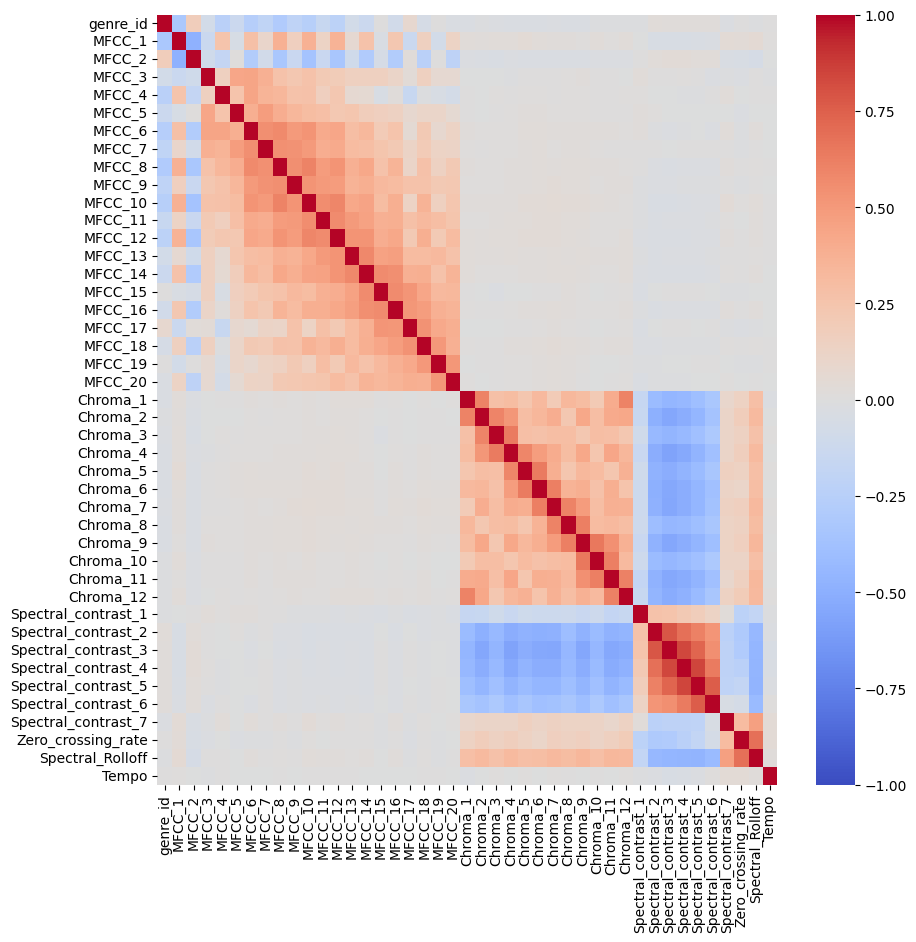

In [11]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", vmin=-1);

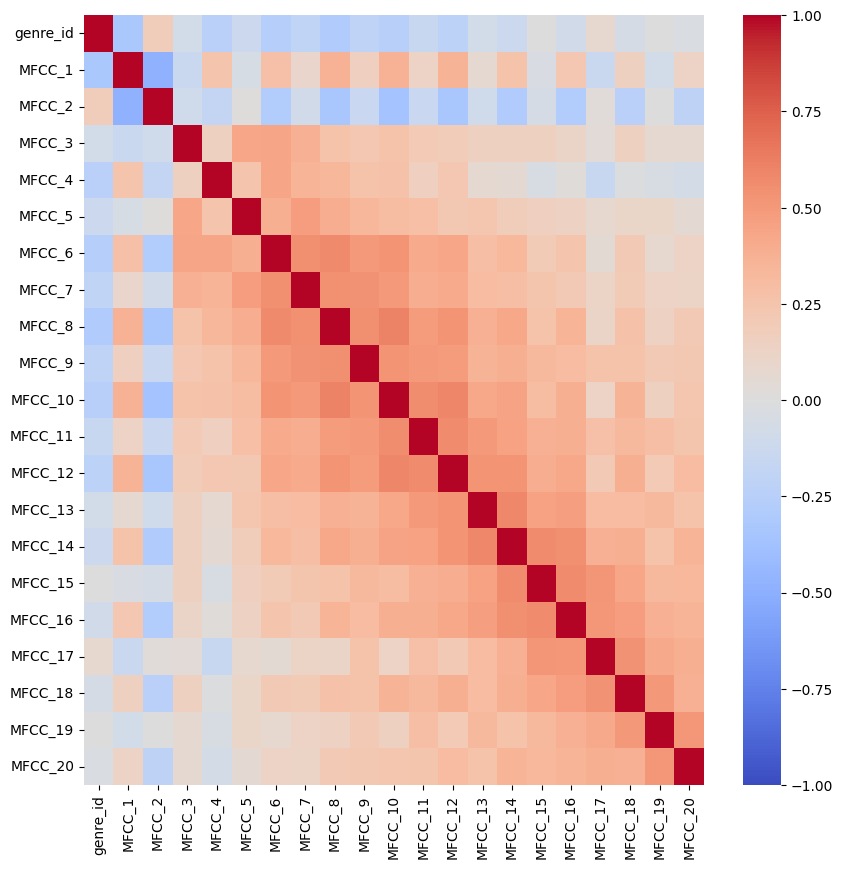

In [12]:
plt.figure(figsize=(10,10))

sns.heatmap(df[['genre_id', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6',
       'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12',
       'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18',
       'MFCC_19', 'MFCC_20']].corr(numeric_only=True), cmap="coolwarm", vmin=-1);

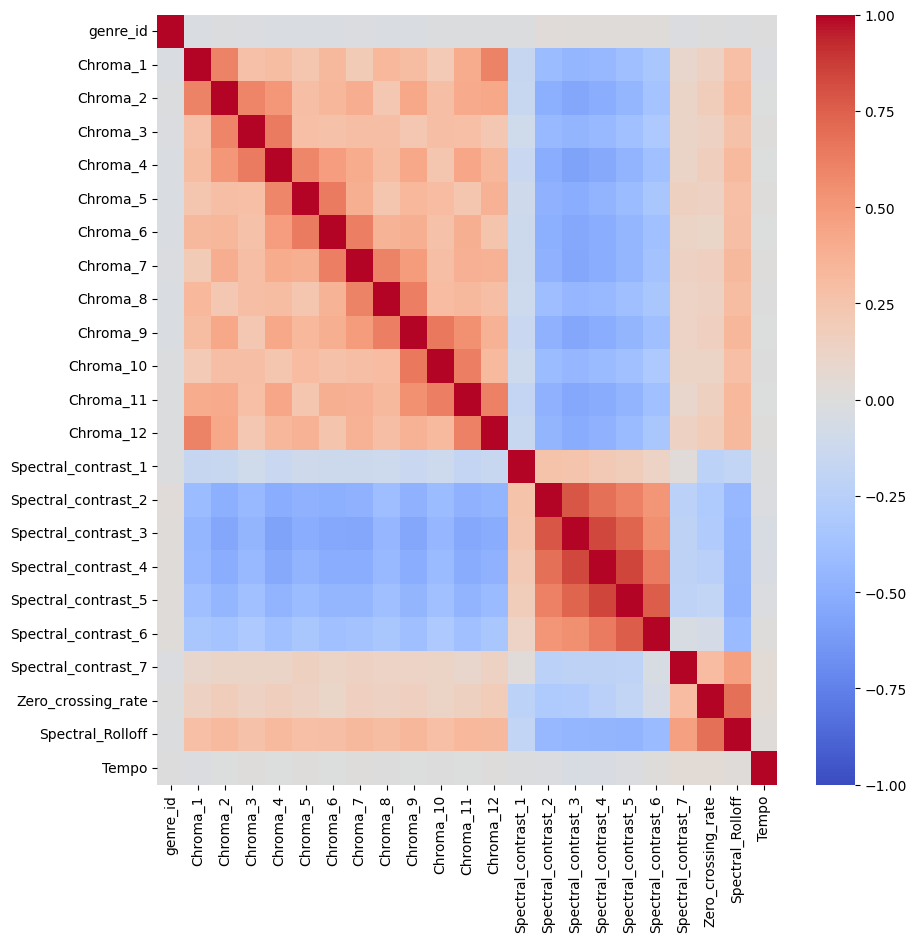

In [13]:
plt.figure(figsize=(10,10))

sns.heatmap(df[['genre_id','Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4',
       'Chroma_5', 'Chroma_6', 'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10',
       'Chroma_11', 'Chroma_12', 'Spectral_contrast_1', 'Spectral_contrast_2',
       'Spectral_contrast_3', 'Spectral_contrast_4', 'Spectral_contrast_5',
       'Spectral_contrast_6', 'Spectral_contrast_7', 'Zero_crossing_rate',
       'Spectral_Rolloff', 'Tempo']].corr(numeric_only=True), cmap="coolwarm", vmin=-1);

### Conclusion:
Tanto el chroma, como  el spectral contrast, como el spectral Rolloff y tempo tienen 0 correlación con el  target. Mientras que los MFCC's si que se aprecia correlacion, aunque no en todos de los 20. No obstante al representar momentos de una canción se trabajará con los 20.

Además siendo las unidades de cada uno muy diferentes se normalizarán los datos.

In [14]:
df = df.copy().drop(columns=['Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4',
       'Chroma_5', 'Chroma_6', 'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10',
       'Chroma_11', 'Chroma_12', 'Spectral_contrast_1', 'Spectral_contrast_2',
       'Spectral_contrast_3', 'Spectral_contrast_4', 'Spectral_contrast_5',
       'Spectral_contrast_6', 'Spectral_contrast_7', 'Zero_crossing_rate',
       'Spectral_Rolloff', 'Tempo'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genre_id  19896 non-null  float64
 1   genre     19896 non-null  object 
 2   MFCC_1    19896 non-null  float64
 3   MFCC_2    19896 non-null  float64
 4   MFCC_3    19896 non-null  float64
 5   MFCC_4    19896 non-null  float64
 6   MFCC_5    19896 non-null  float64
 7   MFCC_6    19896 non-null  float64
 8   MFCC_7    19896 non-null  float64
 9   MFCC_8    19896 non-null  float64
 10  MFCC_9    19896 non-null  float64
 11  MFCC_10   19896 non-null  float64
 12  MFCC_11   19896 non-null  float64
 13  MFCC_12   19896 non-null  float64
 14  MFCC_13   19896 non-null  float64
 15  MFCC_14   19896 non-null  float64
 16  MFCC_15   19896 non-null  float64
 17  MFCC_16   19896 non-null  float64
 18  MFCC_17   19896 non-null  float64
 19  MFCC_18   19896 non-null  float64
 20  MFCC_19   19896 non-null  fl

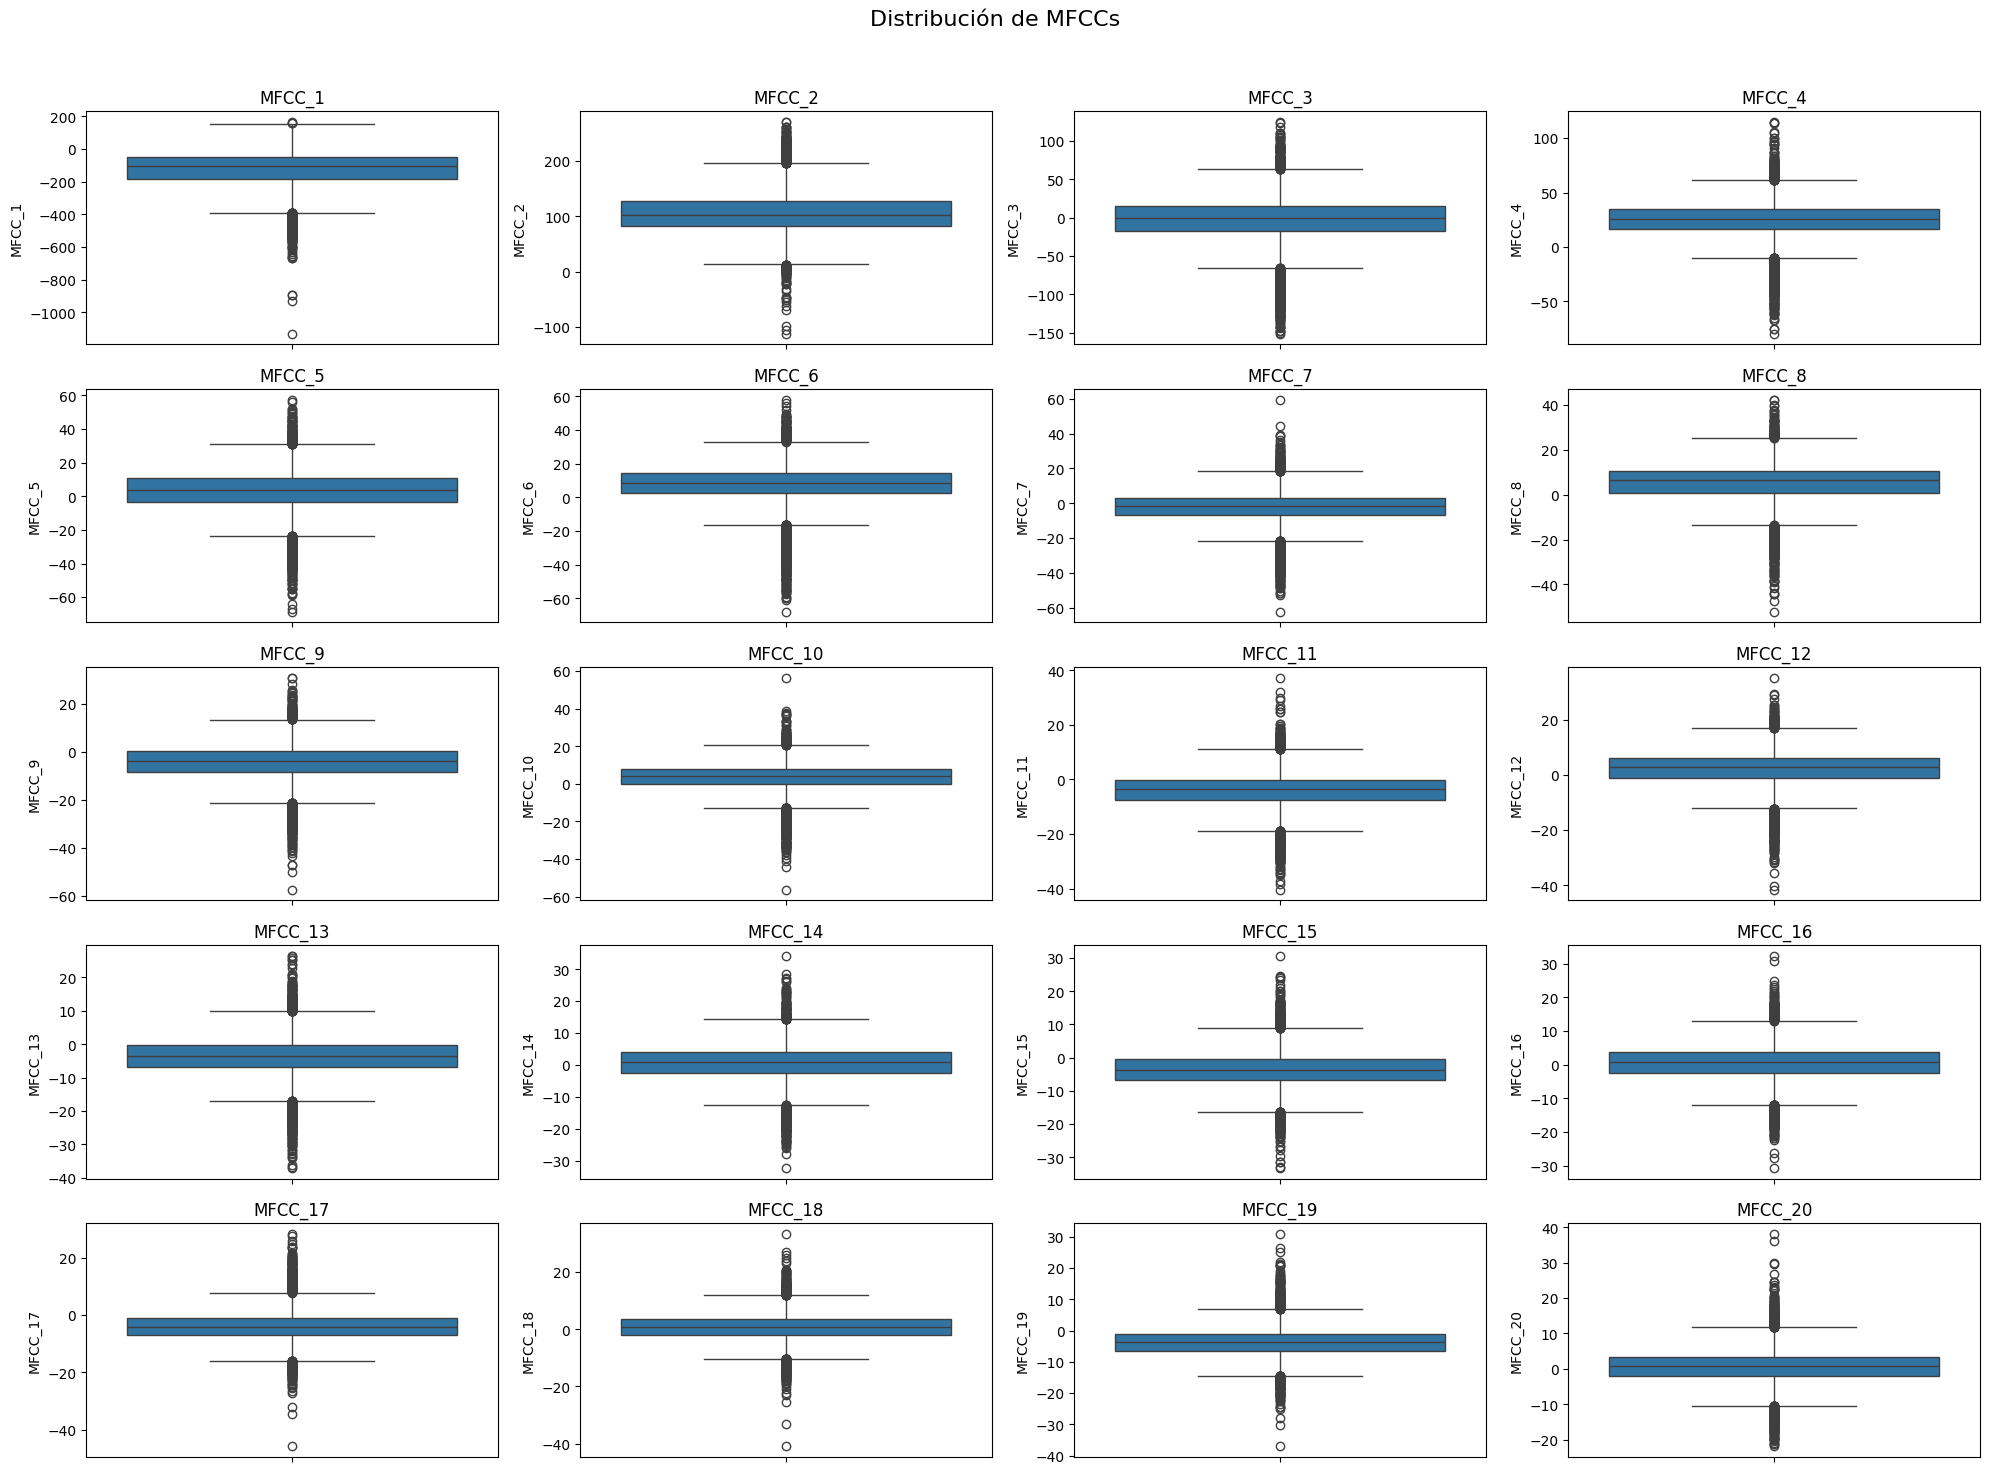

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(20, 15))  
fig.suptitle("Distribución de MFCCs", fontsize=16)

# Generar los boxplots en cada subplot
for i, col in enumerate(df.drop(columns=["genre_id", "genre"])):
    row, col_idx = divmod(i, 4) 
    sns.boxplot(y=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)
    
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para que no se sobreponga con el título
plt.show()

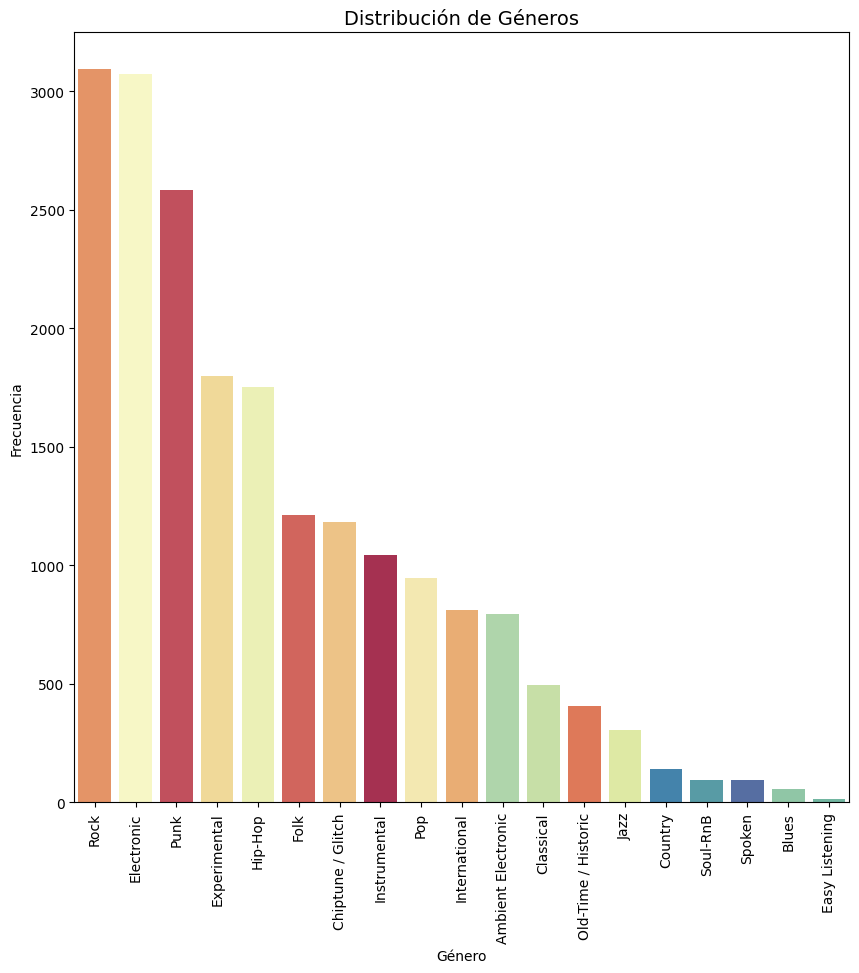

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(x=df["genre"], order=df["genre"].value_counts().index, hue=df["genre"], palette="Spectral", legend=False)

plt.title("Distribución de Géneros", fontsize=14)
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)

plt.show()

Debido al desbalanceo de la variable target se explorarán distantas opciones como agrupar por generos similares, o suprimir generos que puedan ser similares o tengan características que puedan confundirse con otros generos